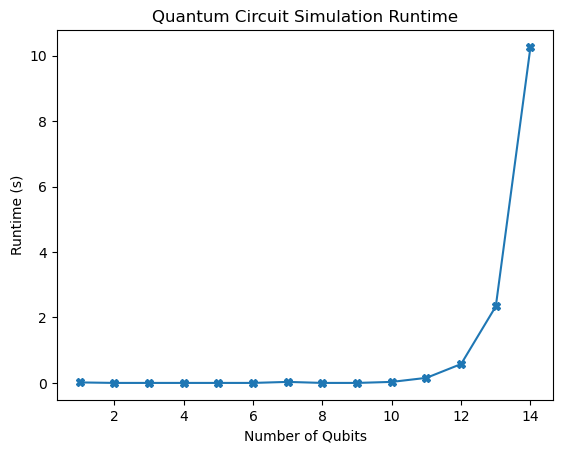

In [2]:
import numpy as np
import time  # to measure how long the simulation takes 
import matplotlib.pyplot as plt

# Defining single-qubit gates
X = np.array([[0, 1], [1, 0]]) # pauli X gate 
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)   # hardamard gate
I = np.array([[1, 0], [0, 1]]) # identity gate 

# Defining 2-qubit CNOT gate
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

# defining a new function which apply a gate to the quantum state , state- quantum state vector we want to manipulate, gate - we want to apply
# qubit- the index of the qubit we want to apply, num_qubits - total no of qubits in the quanntum system

def apply_gate(state, gate, qubit, num_qubits):  # Applies a gate to a specific qubit in the statevector
    
    # Build the full matrix by aplying identity matrices for all qubits except the target qubit
    full_gate = 1  #  current accumulated matrix. It starts as 1 but is built up using the Kronecker product
#used to store the complete gate matrix that acts on the entire system.value 1 here acts as a neutral element for matrix multiplication
    for i in range(num_qubits): # the loop iterates over each qubit index i from 0 to num_qubits -1
        if i == qubit: # checking whether the qubit to which the gate should be applied
            full_gate = np.kron(full_gate, gate)
        else:  
            full_gate = np.kron(full_gate, I) # applying identity matrix to all other qubits
    return np.dot(full_gate, state) # return - o/p of the function, np.dot - performs dot product between arrays
# here matrix multiplication between the full gate and state vector , returns new state vector after applying the gate 


def create_initial_state(num_qubits): # Creates the initial state of the system 
   
    state = np.zeros(2**num_qubits) # creates state where each qubit is initialised to state |0>
    state[0] = 1  # initialise the first state ∣0...0> to have a probability amplitude of 1, means initially the quantum state is fully in state ∣0...0>
    return state  # state [1 0 0 0 0 0..] first state having probability 1

def simulate_circuit(num_qubits): # Simulates a simple quantum circuit with X, H, and CNOT gates
    # Initialize the quantum state
    state = create_initial_state(num_qubits) # state- store each quantum state vector after each gate is applied
    
    # Apply Hadamard to qubit 0
    state = apply_gate(state, H, 0, num_qubits) # gives a state vector with H gate applied to qubit 0
    
    # Apply X to qubit 1
    state = apply_gate(state, X, 1, num_qubits) # applying x gate on qubit 1
    
    # Apply CNOT (control: qubit 0, target: qubit 1)
    if num_qubits >= 2: # for CNOT gate to apply there should be atleast two qubits
        state = np.dot(np.kron(CNOT, np.eye(2**(num_qubits-2))), state) # np.eye(2**(num_qubits-2)): This creates an identity matrix of size 2(num_qubits-2)
    
    return state

# Measure runtime as a function of qubits
qubits = list(range(1,15)) # range of different no of qubits to be run
runtimes = [] # initializing an empty list where the time taken to simlate the circuit for each number of qubits will be stored

for n in qubits: # starts a loop that will iterate over each element n in the qubits list
    start_time = time.time() # returns the current time in seconds as a floating point number.
    simulate_circuit(n) # simulates the quantum circuit for the given number of qubits n
    runtimes.append(time.time() - start_time) # 

# Ploting the runtime vs no of qubits
plt.plot(qubits, runtimes, marker='X')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (s)')
plt.title('Quantum Circuit Simulation Runtime')
plt.show()


In [3]:
# sampling from final states in state vector
def sample_state_vector(state_vector, num_samples=1000): # numsamples- no of samples taht we want to draw from final quantum states
    # Calculating probabilities from the amplitudes
    probabilities = np.abs(state_vector) ** 2 #np.abs computes magnitude
    possible_states = np.arange(len(state_vector)) # Generating possible states 
    samples = np.random.choice(possible_states, size=num_samples, p=probabilities) # Perform sampling based on the probability distribution
    return samples
final_state_vector = simulate_circuit(2)  # runs a quantum circuit with 2 qubits and returns the final state vector of the system
samples = sample_state_vector(final_state_vector) # uses the state vector to simulate 1000 measurements on the quantum state. The resulting
# measurements are randomly drawn based on the quantum probabilities.
print(samples)


[1 1 1 1 1 2 2 2 1 2 2 1 1 2 1 2 1 1 1 1 1 2 1 2 1 1 2 2 1 2 2 1 1 1 2 1 1
 2 2 2 1 1 2 1 1 2 2 1 1 1 2 1 1 2 2 1 2 2 1 2 1 1 2 2 2 1 2 2 2 2 1 1 2 1
 2 2 1 1 1 2 1 2 2 2 2 1 2 1 2 1 1 1 1 2 1 2 2 1 1 2 1 1 2 1 2 1 1 2 1 1 2
 2 1 2 1 2 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 2 2 1 1 1 1 1 2 2 2 1
 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 2
 1 2 1 2 1 2 1 2 2 1 1 1 1 2 1 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 1 2 2 1 2 2 2
 2 1 2 1 2 2 2 1 1 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 1 2 2 2 2 1 1 1 1 2 2 2 2
 1 2 1 1 2 2 1 2 1 2 1 1 2 1 2 1 1 1 1 1 1 2 2 1 2 2 2 2 1 1 1 1 2 1 2 2 2
 1 2 1 2 1 2 1 1 2 2 1 2 1 1 2 1 2 2 2 2 2 2 1 1 1 1 2 1 1 2 1 1 1 1 2 2 2
 2 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1
 2 2 2 2 1 1 1 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2
 2 1 1 1 1 2 1 1 2 2 2 2 1 1 2 2 1 2 2 1 1 1 1 1 2 2 2 2 2 1 2 1 1 1 2 1 2
 1 2 2 1 2 2 2 1 2 2 1 1 2 2 1 1 2 2 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1
 2 1 2 1 1 1 2 1 2 2 1 1 

In [7]:
# COMPUTING EXPECTATION VALUE
def compute_expectation_value(state_vector, operator):
    # Compute ⟨Ψ| O |Ψ⟩
    expectation_value = np.dot(np.conj(state_vector), np.dot(operator, state_vector))
    return expectation_value
# using the Pauli Z operator
Z = np.array([[1, 0], [0, -1]])  # Pauli-Z gate
state_vector = simulate_circuit(1)  # Simulate for a 1-qubit system
expectation = compute_expectation_value(state_vector, Z)
print(f"Expectation value: {expectation}")



Expectation value: 0.0
